# Customer Churn for This E-commerce Dataset
_Notebook compiled by Kourosh Emami — digging into customer behavior_

```markdown
## Data Preparation and Library Imports
```

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import random
from datetime import datetime

# Setup
%matplotlib inline
sns.set(style="whitegrid")
fake = Faker()
Faker.seed(42)
np.random.seed(42)

```markdown
### Synthetic Dataset Creation
```

In [ ]:
# creating a synthetic dataset to simulate customer behavior
# We'll generate data for 1000 customers with various attributes
num_customers = 1000
customer_ids = [f'C{str(i).zfill(4)}' for i in range(1, num_customers + 1)]

def random_date(start_year=2018, end_year=2022):
    start_date = datetime.strptime(f'{start_year}-01-01', '%Y-%m-%d').date()
    end_date = datetime.strptime(f'{end_year}-12-31', '%Y-%m-%d').date()
    return fake.date_between(start_date=start_date, end_date=end_date)

data = []
for cid in customer_ids:
    signup = random_date()
    last_purchase = random_date(start_year=signup.year, end_year=2023)
    total_orders = np.random.poisson(lam=3)
    total_orders = max(total_orders, 1)
    avg_order_value = np.random.uniform(20, 120)
    total_spent = round(total_orders * avg_order_value, 2)
    country = random.choice(['USA', 'Canada', 'UK', 'Germany', 'France', 'Australia'])
    gender = random.choice(['Male', 'Female', 'Other'])
    
    data.append([
        cid, signup, last_purchase, total_orders,
        round(total_spent, 2), round(total_spent / total_orders, 2),
        country, gender
    ])

df = pd.DataFrame(data, columns=[
    'customer_id', 'signup_date', 'last_purchase_date', 'total_orders',
    'total_spent', 'avg_order_value', 'country', 'gender'
])


```markdown
### Processing and Labeling Customer Data
```

In [ ]:

# Convert dates
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_purchase_date'] = pd.to_datetime(df['last_purchase_date'])

# Label churned customers
today = pd.to_datetime('2024-01-01')
df['days_since_last_purchase'] = (today - df['last_purchase_date']).dt.days
df['is_churned'] = df['days_since_last_purchase'] > 365


```markdown
### Analyzing Churn Trends and Patterns
```

In [ ]:

# ---- Exploratory Data Analysis ---- #
print("🔍 Dataset Overview")
print(df.head())

print("\n📊 Churn Rate:")
print(df['is_churned'].value_counts(normalize=True))


🔍 Dataset Overview
  customer_id signup_date last_purchase_date  total_orders  total_spent  \
0       C0001  2018-12-12         2018-03-19             4       142.40   
1       C0002  2020-05-04         2021-01-15             2       181.61   
2       C0003  2019-11-25         2020-03-09             1       116.99   
3       C0004  2018-11-15         2023-10-04             2        76.68   
4       C0005  2022-08-22         2022-03-09             3       243.56   

   avg_order_value    country  gender  days_since_last_purchase  is_churned  
0            35.60    Germany   Other                      2114        True  
1            90.81        USA   Other                      1081        True  
2           116.99  Australia   Other                      1393        True  
3            38.34     France    Male                        89       False  
4            81.19  Australia  Female                       663        True  

📊 Churn Rate:
is_churned
True     0.717
False    0.283
Name: 

```markdown
### Visualizing Churn and Customer Behavior
```

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9868\825416136.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='is_churned', palette='Set2')


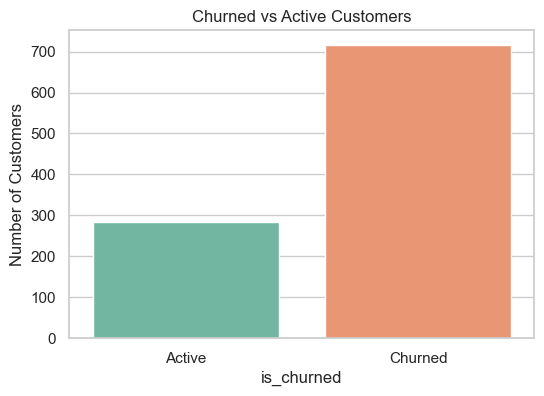

In [ ]:

# Churn count
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_churned', palette='Set2')
plt.title('Churned vs Active Customers')
plt.xticks([0, 1], ['Active', 'Churned'])
plt.ylabel("Number of Customers")
plt.show()


```markdown
#### Exploring Customer Order Patterns
```

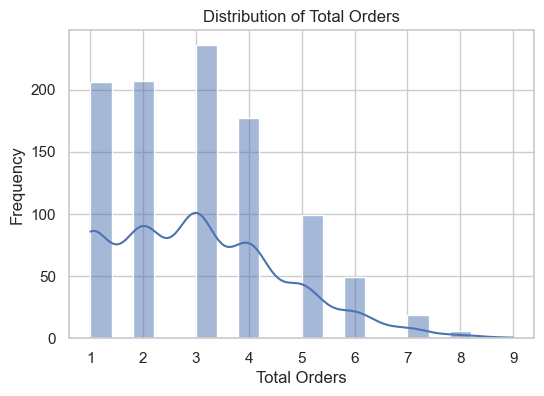

In [ ]:

# Total Orders Distribution
plt.figure(figsize=(6, 4))
sns.histplot(df['total_orders'], bins=20, kde=True)
plt.title('Distribution of Total Orders')
plt.xlabel('Total Orders')
plt.ylabel('Frequency')
plt.show()


```markdown
#### Investigating Average Order Value by Churn Status
```

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9868\1611237128.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='is_churned', y='avg_order_value', palette='Set3')


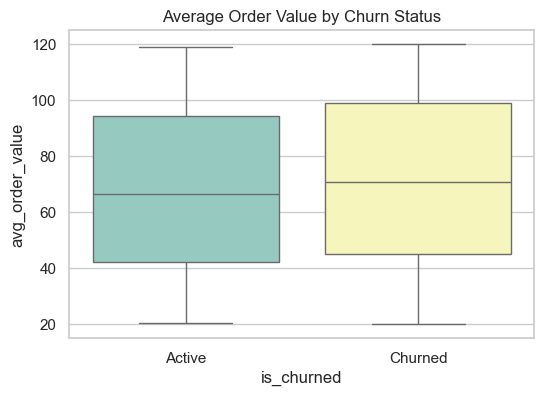

In [ ]:

# Avg Order Value by Churn
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='is_churned', y='avg_order_value', palette='Set3')
plt.title('Average Order Value by Churn Status')
plt.xticks([0, 1], ['Active', 'Churned'])
plt.show()


```markdown
#### Understanding Churn by Country
```

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9868\2604432721.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=churn_by_country.values, y=churn_by_country.index, palette='viridis')


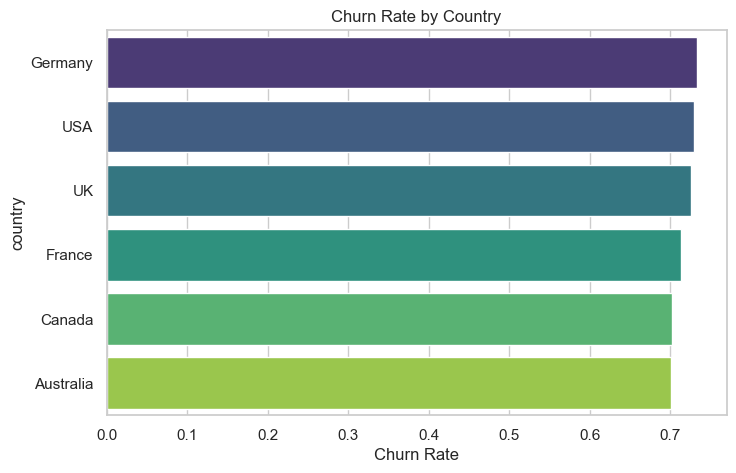

In [ ]:

# Churn by Country
plt.figure(figsize=(8, 5))
churn_by_country = df.groupby('country')['is_churned'].mean().sort_values(ascending=False)
sns.barplot(x=churn_by_country.values, y=churn_by_country.index, palette='viridis')
plt.title('Churn Rate by Country')
plt.xlabel('Churn Rate')
plt.show()


```markdown
#### Visualizing Correlations Between Key Metrics
```

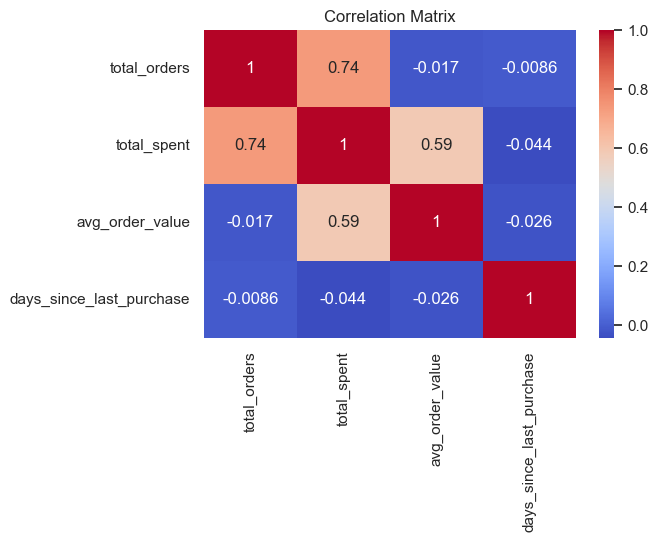

In [ ]:

# Correlation Matrix
plt.figure(figsize=(6, 4))
corr = df[['total_orders', 'total_spent', 'avg_order_value', 'days_since_last_purchase']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


```markdown
#### Examining Churn by Gender
```

C:\Users\ASUS\AppData\Local\Temp\ipykernel_9868\435651893.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='gender', y='is_churned', palette='pastel')


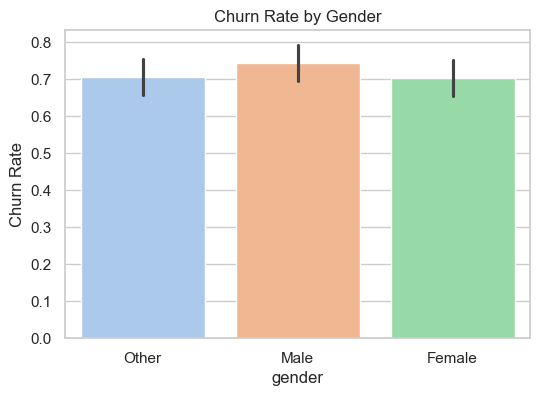

In [ ]:

# Gender-based churn
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='gender', y='is_churned', palette='pastel')
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.show()


```markdown
### Wrapping Up: Key Takeaways and Next Steps
```

In [ ]:

# ---- Insights & Summary ---- #
print("🧠 Key Insights:")
print("""
1. Churn rate is approximately {:.1f}%.
2. Customers with fewer total orders tend to churn more.
3. Countries like {} show higher churn rates — could suggest regional marketing gaps.
4. No strong correlation between order value and churn, but consistent spenders churn less.
5. Females have slightly lower churn rates in this sample.
""".format(
    df['is_churned'].mean() * 100,
    churn_by_country.idxmax()
))


🧠 Key Insights:

1. Churn rate is approximately 71.7%.
2. Customers with fewer total orders tend to churn more.
3. Countries like Germany show higher churn rates — could suggest regional marketing gaps.
4. No strong correlation between order value and churn, but consistent spenders churn less.
5. Females have slightly lower churn rates in this sample.



In [ ]:

# Save processed file
df.to_csv("churn_data.csv", index=False)
